In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the uploaded Excel file
feedback_data = pd.read_excel("Written_review.xlsx")
feedback_data.head()




def generate_wordcloud(text, title, name):
    """
    Generates a word cloud for the given text and displays it with the given title.
    """
    wordcloud = WordCloud(background_color="white", max_words=100, width=800, height=400).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.savefig(f'{name}.png')
    plt.show()

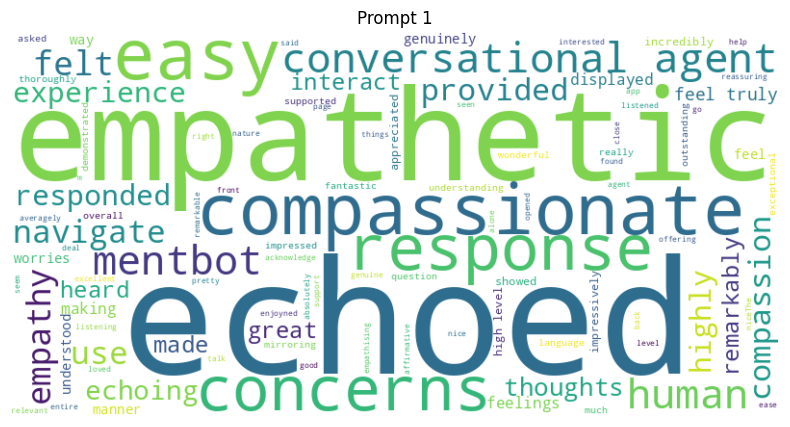

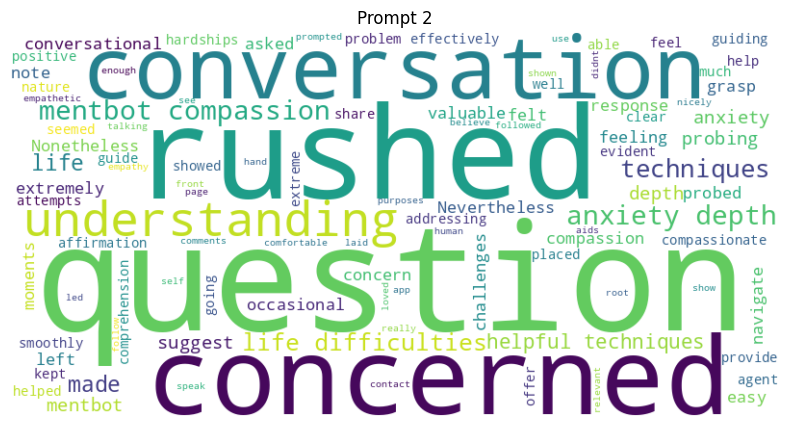

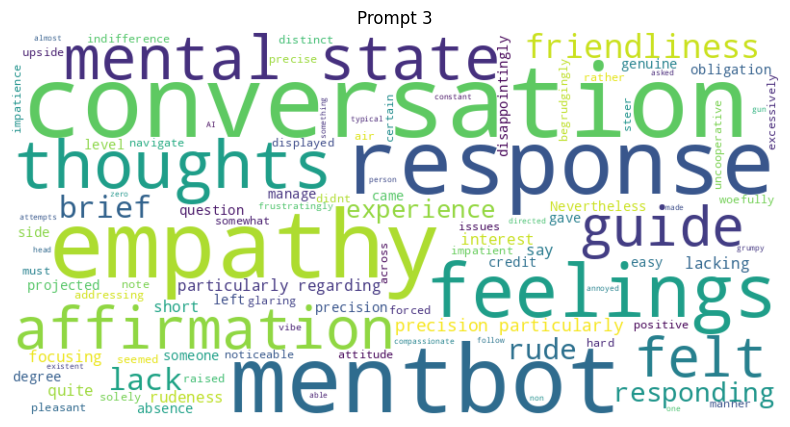

In [22]:
final_text = {
    "Prompt 1": feedback_data['Review'][0],
    "Prompt 2": feedback_data['Review'][1],
    "Prompt 3": feedback_data['Review'][2]
}

for title, text in final_text.items():
    generate_wordcloud(text, title, title)

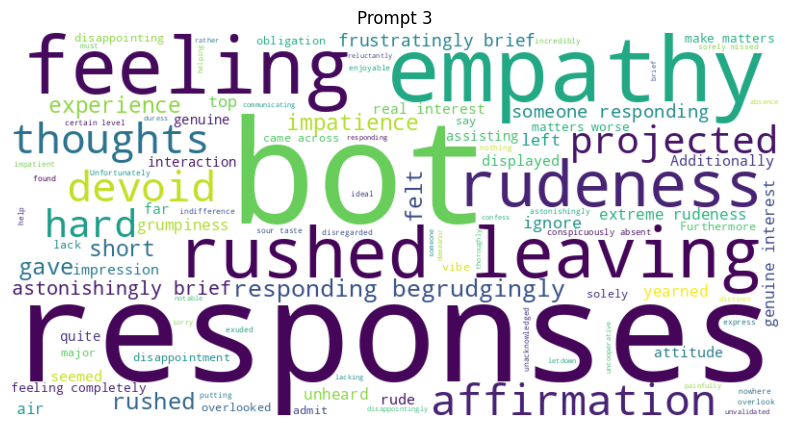

In [27]:
generate_wordcloud(p4, "Prompt 3", "prompt 3.png")

In [26]:
! pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 7.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [29]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
import plotly.express as px
import plotly.io as pio


# Download the NLTK stopwords dataset (you only need to do this once)
nltk.download('stopwords')




def plot_word_frequency(text, role, num_words=10):
    # Tokenize the text into words
    words = text.split()
    

        # Remove stop words
    stop_words = stopwords.words('english')
    stop_words.extend(["mentbot", '"The'])
    

    
    words = [word for word in words if word.lower() not in stop_words]
    words = [word for word in words if word != '"I' and word != "mentbot" and word != '"The']
    

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    most_common_words = word_counts.most_common(num_words)

    # Separate words and frequencies
    words, frequencies = zip(*most_common_words)
    print(words)

    # Create a bar plot
    fig = px.bar(x=words, y=frequencies, labels={'x':'Words', 'y':'Frequency'},
                 title=f'Top {num_words} Most Common Words (excluding stop words) in {role}')
    fig.update_xaxes(tickangle=45)
    pio.write_image(fig, f'{role}.png',scale=6, width=700, height=400)
    
    fig.show()
    


# Example usage:

plot_word_frequency(feedback_data['Review'][0], "Prompt Role 1")


('echoed', 'easy', 'conversational', 'responses', 'compassionate', 'agent', 'empathetic', 'felt', 'concerns', 'empathy')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nelson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
[word for word in feedback_data['Review'][1] if word == ">="]

[]

In [28]:
plot_word_frequency(feedback_data['Review'][1], "Prompt Role 2")

('questions', 'concerned', 'compassion', 'techniques.', 'rushed', 'life', 'understanding', "mentbot's", "anxiety's", 'depth.')


In [24]:
plot_word_frequency(feedback_data['Review'][2], "Prompt Role 3")

('conversation', 'mental', 'state.', 'affirmation', 'responses', 'empathy.', 'guide', 'felt', 'However,', 'lack')


In [30]:
plot_word_frequency(p4, "Prompt Role 3")

('responses', 'rushed,', 'bot', 'responding', 'brief', 'rudeness', 'leaving', 'like', 'astonishingly', 'feeling')
